In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import skew

In [ ]:
file_path = "/content/drive/MyDrive/Cattle_WT_Prediction/HF crossbred data for analysis 25.07.25.xlsx"

In [ ]:
df = pd.read_excel(file_path)

1. **WHHeightAtWither** - Wither Height – vertical distance from the ground to the top of the withers (ridge between the shoulder blades). Indicates overall size and frame.
2. **Rumpheight** - Vertical height from the ground to the rump (back end of the cow). Helps assess body balance and muscle development.
3. **BLBodylengthcm** - Body Length in cm – from the shoulder point to the pin bone. Longer bodies often mean more muscle mass.
4. **Scapuloischiallength** - Distance from the shoulder (scapula) to the hip (ischium). Measures skeletal length, contributes to overall size.
5. **SternumHeight** - Height from the ground to the chest base (sternum). May indicate lower body fullness, but is less directly related to weight.
6. **ChestDepth** - Vertical chest depth from the top of the spine to the bottom of the chest. Indicates body volume and capacity, especially for feeding and reproduction.
7. **RumpWidth** - Width across the rump (hip to hip). Reflects hindquarter muscling and is important for meat yield.
8. **RumpLength** - Horizontal length from hip bone to pin bone. Longer rumps may indicate better meat yield.
9. **HeartGirth** - Circumference around the chest just behind the front legs. Strongly correlated with body weight – easy to measure in field settings.
10. **AbdGirth** - Abdominal Girth – circumference around the belly area. Also highly correlated with body weight.
11. **CannonBoneDiameter** - Diameter of the lower leg bone (cannon bone). Reflects bone structure, possibly associated with animal strength.
12. **HockBoneDiameter** - Diameter around the hock joint (hind leg). Also measures bone robustness, but less directly tied to weight.

Target variable - ActualBodyWeight

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   AnimalNo              517 non-null    int64  
 1   WHHeightAtWither      517 non-null    int64  
 2   Rumpheight            517 non-null    int64  
 3   BLBodylengthcm        517 non-null    int64  
 4   Scapuloischiallength  517 non-null    int64  
 5   SternumHeight         517 non-null    int64  
 6   ChestDepth            517 non-null    int64  
 7   RumpWidth             517 non-null    int64  
 8   RumpLength            517 non-null    int64  
 9   HeartGirth            517 non-null    int64  
 10  AbdGirth              517 non-null    int64  
 11  CannonBoneDiameter    517 non-null    float64
 12  HockBoneDiameter      517 non-null    int64  
 13  ActualBodyWeight      517 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 56.7 KB


In [ ]:
df.describe()

,AnimalNo,WHHeightAtWither,Rumpheight,BLBodylengthcm,Scapuloischiallength,SternumHeight,ChestDepth,RumpWidth,RumpLength,HeartGirth,AbdGirth,CannonBoneDiameter,HockBoneDiameter,ActualBodyWeight
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,10800.692456,151.431335,160.756286,212.661509,177.071567,65.847195,99.266925,46.340426,37.845261,202.653772,245.994197,20.277563,48.837524,602.344294
std,66719.581279,6.173024,6.408765,11.880034,9.689196,4.981930,5.277046,4.553320,3.568168,9.794697,13.357124,1.211556,4.830530,78.114614
min,2.000000,131.000000,139.000000,177.000000,145.000000,54.000000,82.000000,35.000000,28.000000,171.000000,203.000000,17.000000,40.000000,379.000000
25%,2740.000000,147.000000,157.000000,206.000000,171.000000,62.000000,96.000000,43.000000,36.000000,196.000000,238.000000,20.000000,45.000000,547.000000
50%,3425.000000,152.000000,161.000000,213.000000,178.000000,66.000000,100.000000,46.000000,38.000000,203.000000,246.000000,20.000000,48.000000,601.000000
75%,4186.000000,156.000000,165.000000,220.000000,184.000000,69.000000,103.000000,50.000000,40.000000,210.000000,255.000000,21.000000,52.000000,653.000000
max,999113.000000,169.000000,180.000000,246.000000,204.000000,80.000000,116.000000,59.000000,49.000000,233.000000,282.000000,24.000000,64.000000,824.000000


In [ ]:
corr = df.corr()

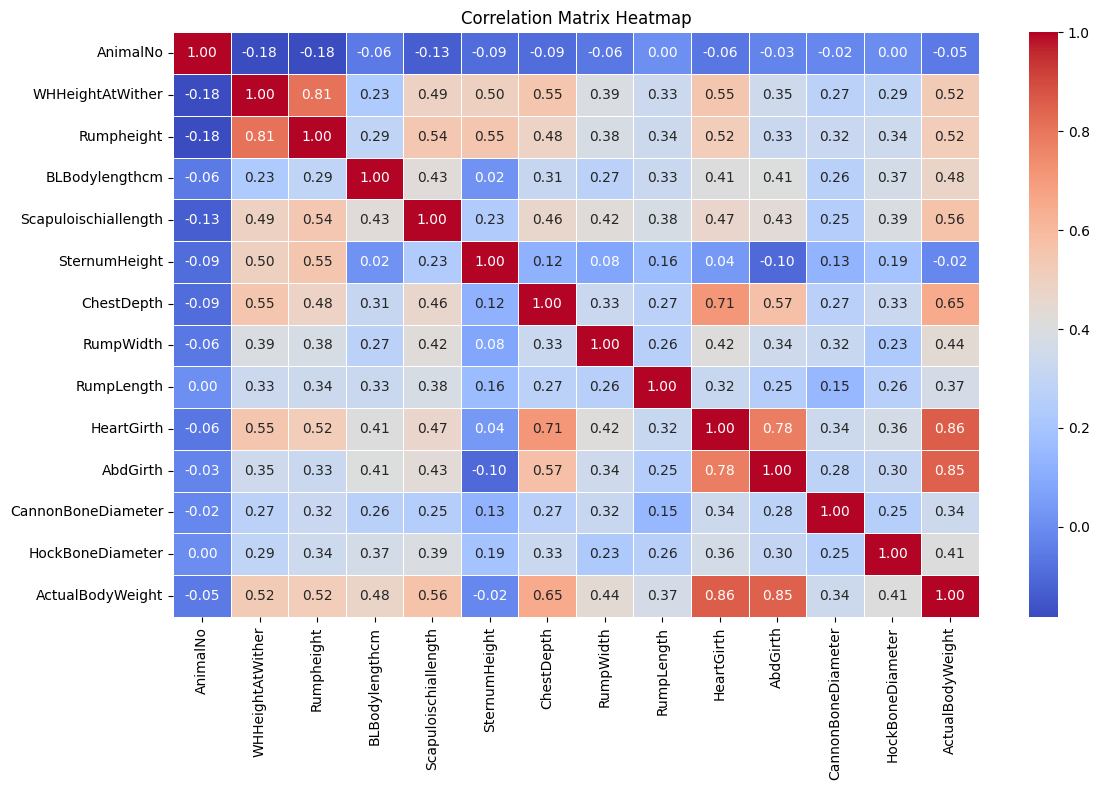

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.tight_layout()
plt.show()

1. SternumHeight not correlated to AbdGirth and Actual body weight
2. Actual body weight - highly correlated features
    * HeartGirth and AbdGirth (above 0.8 threshold)
    * WWHeightAtWither , Rumpheight , Scapuloischiallength ,ChestDepth (above 0.5 threshold)
    * RumpWidth , RumpLength , BLBodylengthcm ,CannonBoneDiameter ,HockBoneDiameter (below 0.5 threshold)
    * BLBodylengthcm close to 0.5 threshold = 0.48

In [ ]:
df_numeric = df.drop(columns=['AnimalNo'], errors='ignore')

also try to remove body weight

In [ ]:
outlier_summary = {}
for col in df_numeric.select_dtypes(include=[np.number]).columns:
    Q1 = df_numeric[col].quantile(0.25)
    Q3 = df_numeric[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df_numeric[(df_numeric[col] < Q1 - 1.5 * IQR) | (df_numeric[col] > Q3 + 1.5 * IQR)]
    outlier_summary[col] = len(outliers)

print("Outlier Count (IQR method):")
for k, v in outlier_summary.items():
    print(f"{k}: {v} outliers")

Outlier Count (IQR method):
WHHeightAtWither: 4 outliers
Rumpheight: 10 outliers
BLBodylengthcm: 10 outliers
Scapuloischiallength: 8 outliers
SternumHeight: 1 outliers
ChestDepth: 10 outliers
RumpWidth: 0 outliers
RumpLength: 9 outliers
HeartGirth: 4 outliers
AbdGirth: 6 outliers
CannonBoneDiameter: 52 outliers
HockBoneDiameter: 3 outliers
ActualBodyWeight: 2 outliers


/tmp/ipython-input-183753375.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_melted, x="Feature", y="Value", palette="Set3")


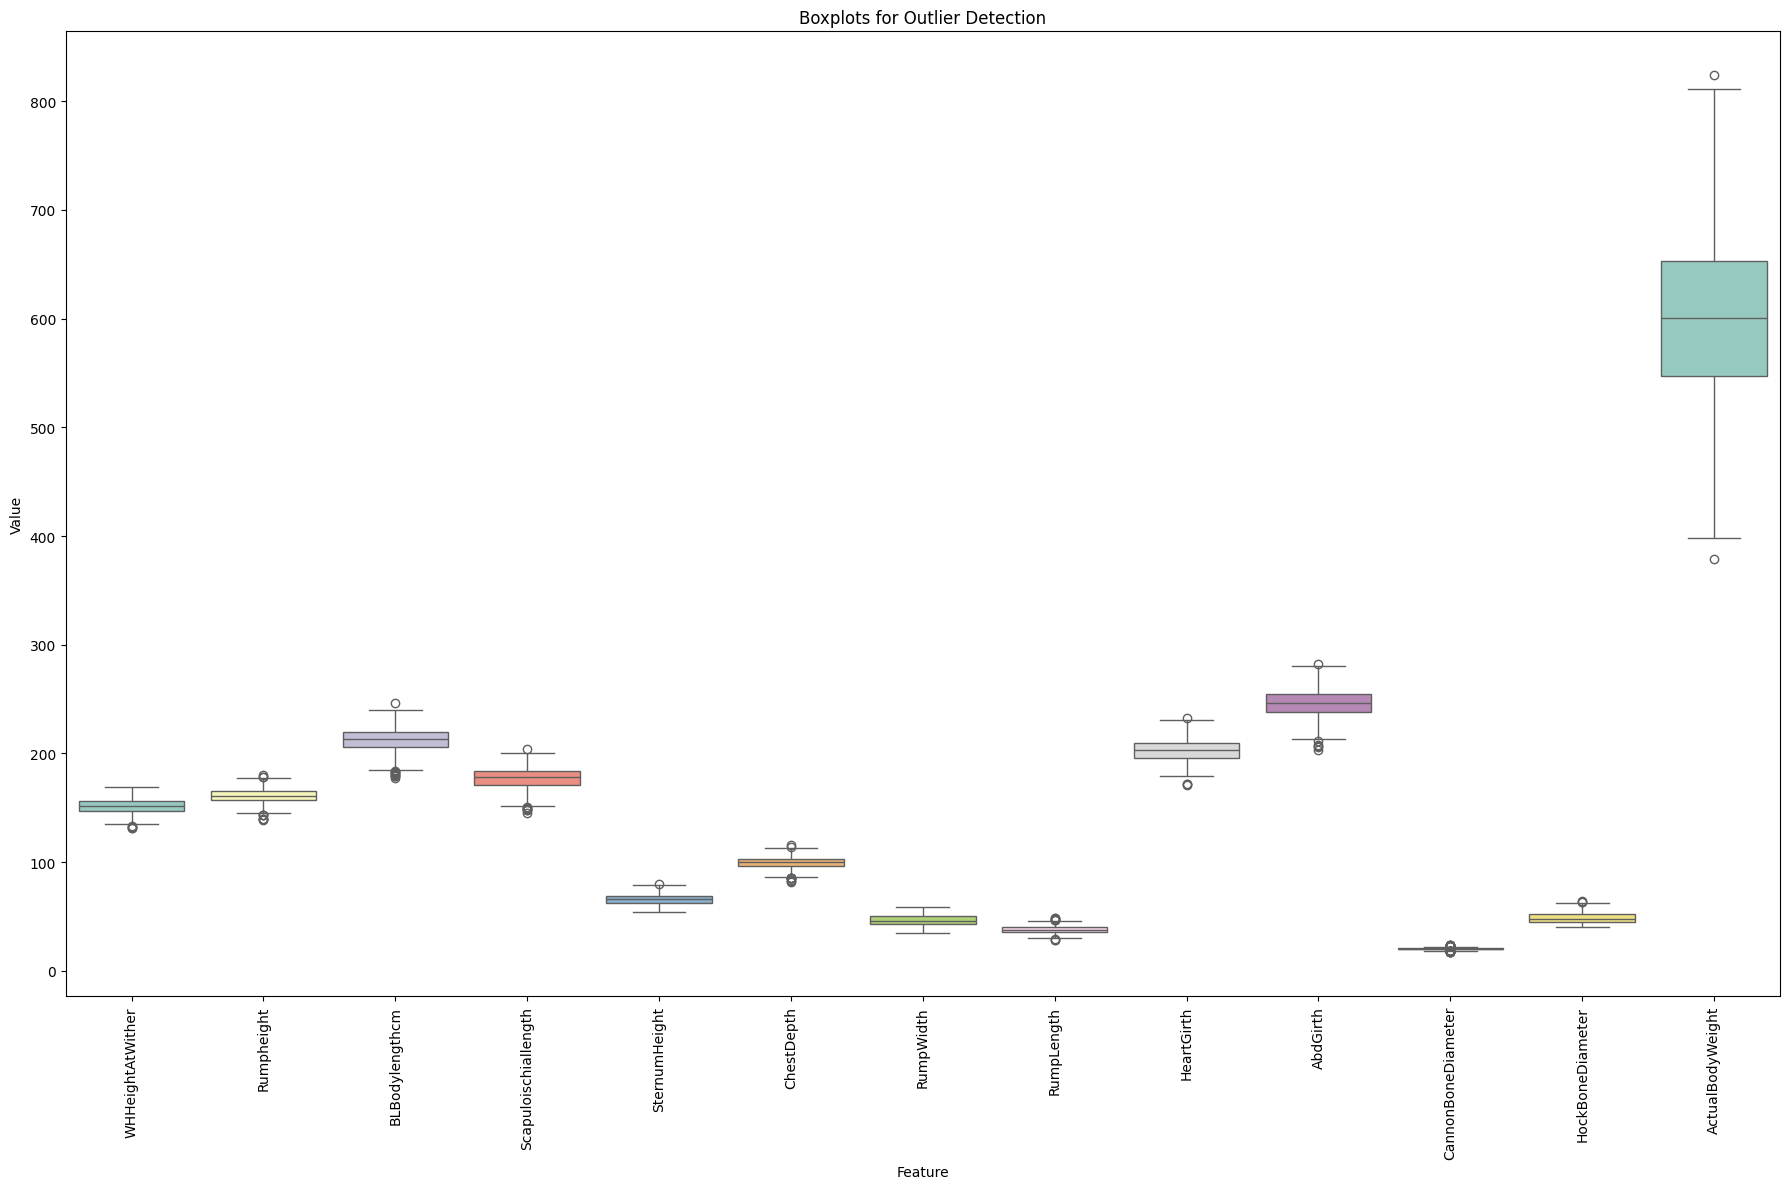

In [ ]:
plt.figure(figsize=(18, 12))
df_melted = df_numeric.melt(var_name="Feature", value_name="Value")
sns.boxplot(data=df_melted, x="Feature", y="Value", palette="Set3")
plt.xticks(rotation=90)
plt.title("Boxplots for Outlier Detection")
plt.tight_layout()
plt.show()

CannonBoneDiameter a problem


To mitigate the influence of outliers
1. Winsorization to only CannonBoneDiameter because it changes the original values and depends on model selection
2. Transformations (log or square root) - not needed because most features are approximately normal or only mildly skewed.
3. Robust Scaler (should produce decent results) because of moderate presence of outliers


In [ ]:
X = df_numeric.drop(columns=['ActualBodyWeight'], errors='ignore').dropna()
X_const = X.copy()
X_const['Intercept'] = 1

vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X_const.values, i) for i in range(len(X.columns))]

print("\n Variance Inflation Factor:")
print(vif_data.sort_values(by="VIF", ascending=False))


 Variance Inflation Factor:
                 Feature       VIF
8             HeartGirth  4.139635
1             Rumpheight  3.688155
0       WHHeightAtWither  3.513503
9               AbdGirth  2.816628
5             ChestDepth  2.253178
3   Scapuloischiallength  1.868473
4          SternumHeight  1.796706
2         BLBodylengthcm  1.455144
6              RumpWidth  1.407549
11      HockBoneDiameter  1.343419
7             RumpLength  1.272001
10    CannonBoneDiameter  1.238127


Since VIF values are below 5 , moderatley less of concern

In [ ]:
skewness_values = df_numeric.skew().sort_values(ascending=False)
print("Skewness of features:\n")
print(skewness_values)

Skewness of features:

HockBoneDiameter        0.589320
CannonBoneDiameter      0.227408
RumpWidth               0.203034
RumpLength              0.199464
ActualBodyWeight        0.084253
SternumHeight          -0.011176
HeartGirth             -0.020107
AbdGirth               -0.162361
ChestDepth             -0.198221
WHHeightAtWither       -0.230770
Rumpheight             -0.308130
Scapuloischiallength   -0.368716
BLBodylengthcm         -0.387889
dtype: float64


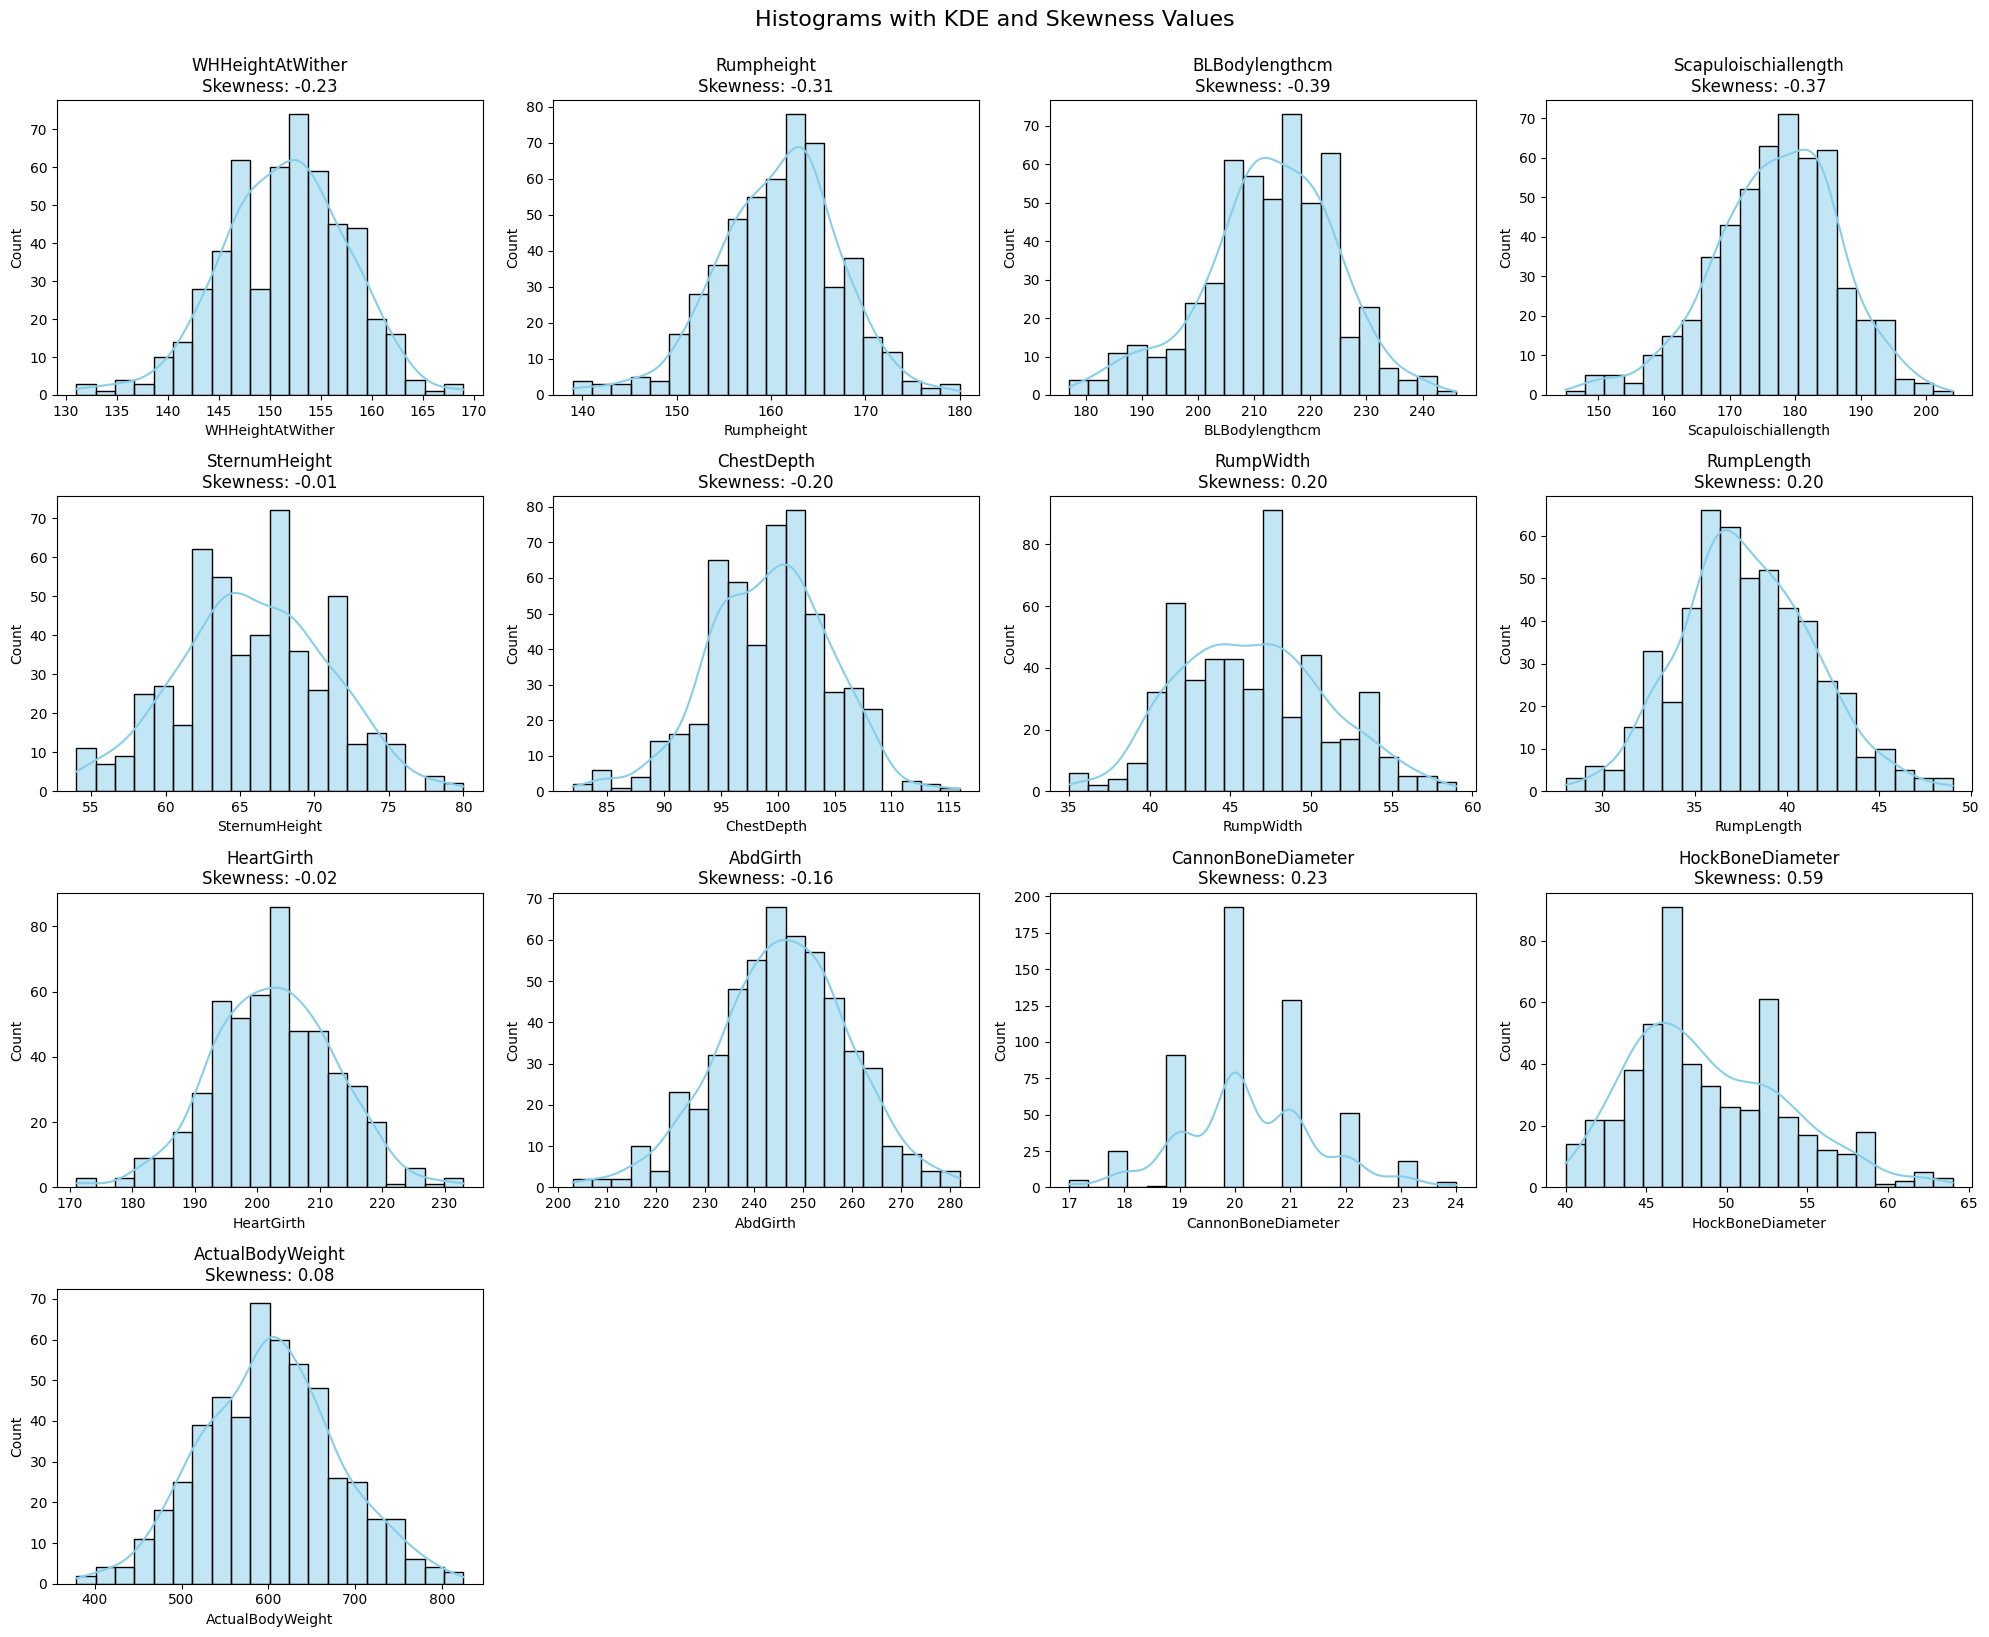

In [ ]:
num_features = df_numeric.shape[1]
cols = 4
rows = (num_features + cols - 1) // cols

plt.figure(figsize=(cols * 5, rows * 4))

for i, col in enumerate(df_numeric.columns):
    plt.subplot(rows, cols, i + 1)
    sns.histplot(df_numeric[col], kde=True, bins=20, color='skyblue')
    plt.title(f"{col}\nSkewness: {skewness_values[col]:.2f}")

plt.tight_layout()
plt.suptitle("Histograms with KDE and Skewness Values", fontsize=16, y=1.02)
plt.show()

1. Box-Cox to better resemble a normal distribution
2. Log Transformations when using linear, ridge, lasso
3. Scailing required if NN used.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

In [ ]:
X = df.drop(columns=['ActualBodyWeight'])
y = df['ActualBodyWeight']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (413, 13)
Testing set shape: (104, 13)


In [ ]:
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
importances = rf.feature_importances_
feat_importances = pd.Series(importances, index=X_train.columns)
feat_importances = feat_importances.sort_values(ascending=False)

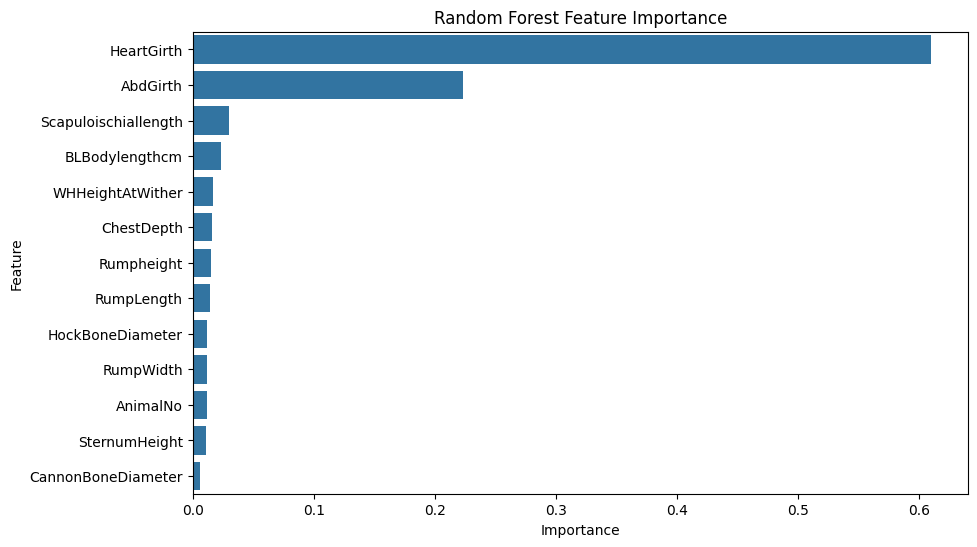

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x=feat_importances, y=feat_importances.index)
plt.title("Random Forest Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

In [ ]:
import shap

explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_train)

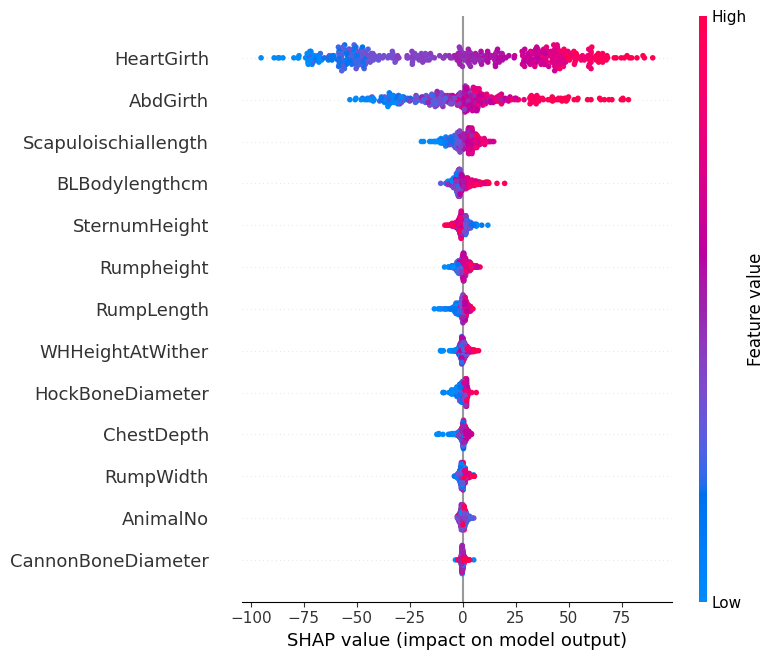

In [ ]:
shap.summary_plot(shap_values, X_train)

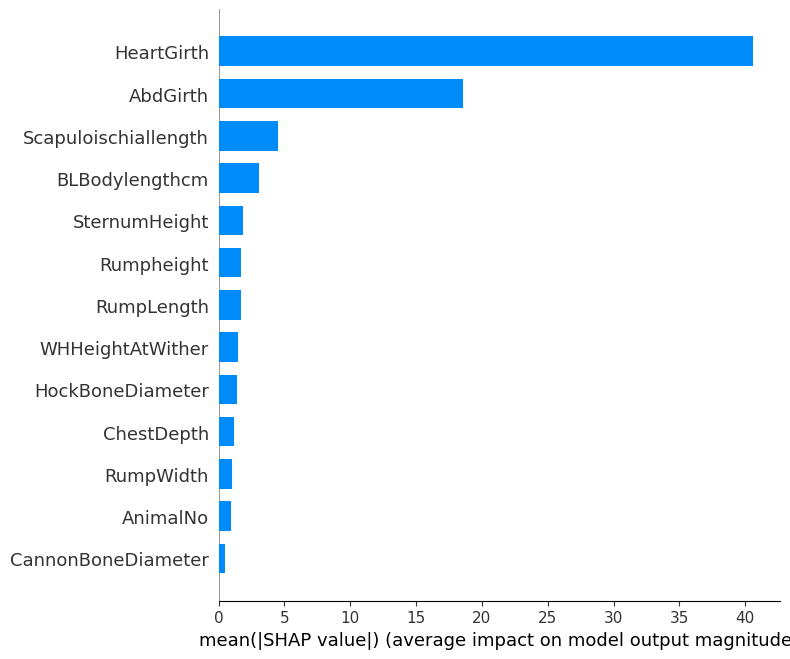

In [ ]:
shap.summary_plot(shap_values, X_train, plot_type="bar")

The fact that RandomForest importance and SHAP both highlight HeartGirth and AbdGirth as top features increases confidence that these features are truly important and not just model-specific artifacts.

In [ ]:
from sklearn.model_selection import GridSearchCV, KFold,cross_val_score ,  RepeatedKFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.base import clone
from sklearn.decomposition import PCA

In [ ]:
cv = KFold(n_splits=5, shuffle=True, random_state=42)

In [ ]:
pipelines = {
    "Linear Regression": (Pipeline([("scaler", StandardScaler()), ("model", LinearRegression())]),
                          {"model__fit_intercept": [True, False]}),

    "Ridge": (Pipeline([("scaler", StandardScaler()), ("model", Ridge(random_state=42))]),
              {"model__alpha": [0.1, 1, 10, 100]}),

    "Lasso": (Pipeline([("scaler", StandardScaler()), ("model", Lasso(random_state=42, max_iter=20000))]),
              {"model__alpha": [0.0005, 0.001, 0.01, 0.1, 1]}),

    "ElasticNet": (Pipeline([("scaler", StandardScaler()), ("model", ElasticNet(random_state=42, max_iter=20000))]),
                   {"model__alpha": [0.0005, 0.001, 0.01, 0.1, 1],
                    "model__l1_ratio": [0.2, 0.5, 0.8]}),

    "SVR (RBF)": (Pipeline([("scaler", StandardScaler()), ("model", SVR())]),
                  {"model__C": [1, 10, 50, 100],
                   "model__gamma": ["scale", 0.1, 0.01],
                   "model__epsilon": [0.1, 0.2]}),

    "KNN": (Pipeline([("scaler", StandardScaler()), ("model", KNeighborsRegressor())]),
            {"model__n_neighbors": [3,5,7,9],
             "model__weights": ["uniform", "distance"]}),

    "Random Forest": (RandomForestRegressor(random_state=42, n_jobs=-1),
                      {"n_estimators": [200, 400, 600],
                       "max_depth": [None, 8, 12],
                       "min_samples_split": [2, 5],
                       "min_samples_leaf": [1, 2]}),

    "XGBoost": (XGBRegressor(random_state=42, n_jobs=-1, tree_method="hist"),
                {"n_estimators": [300, 600],
                 "max_depth": [3, 5, 7],
                 "learning_rate": [0.03, 0.1],
                 "subsample": [0.8, 1.0],
                 "colsample_bytree": [0.8, 1.0]}),

    "LightGBM": (LGBMRegressor(random_state=42, n_jobs=-1),
                 {"n_estimators": [300, 600],
                  "max_depth": [-1, 8, 12],
                  "num_leaves": [31, 63],
                  "learning_rate": [0.03, 0.1],
                  "subsample": [0.8, 1.0],
                  "colsample_bytree": [0.8, 1.0]})
}

In [ ]:
results = []
best_models = {}

In [ ]:
for name, (estimator, param_grid) in pipelines.items():
    gs = GridSearchCV(
        estimator=estimator,
        param_grid=param_grid,
        scoring={"r2": "r2", "rmse": "neg_root_mean_squared_error"},
        refit="r2",
        cv=cv,
        n_jobs=-1
    )
    gs.fit(X_train, y_train)
    best_models[name] = gs.best_estimator_

    cv_r2 = gs.best_score_
    cv_rmse = -gs.cv_results_["mean_test_rmse"][gs.best_index_]

    y_pred = gs.best_estimator_.predict(X_test)
    test_r2 = r2_score(y_test, y_pred)
    test_rmse = mean_squared_error(y_test, y_pred)

    results.append({
        "Model": name,
        "CV R2": cv_r2,
        "CV RMSE": cv_rmse,
        "Test R2": test_r2,
        "Test RMSE": test_rmse,
        "Best Params": gs.best_params_
    })

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000101 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 504
[LightGBM] [Info] Number of data points in the train set: 413, number of used features: 13
[LightGBM] [Info] Start training from score 603.607748
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

In [ ]:
results_df = pd.DataFrame(results).sort_values(by="CV R2", ascending=False)
results_df

,Model,CV R2,CV RMSE,Test R2,Test RMSE,Best Params
3,ElasticNet,0.838700,29.757869,0.871983,943.974253,"{'model__alpha': 0.1, 'model__l1_ratio': 0.5}"
1,Ridge,0.838600,29.780301,0.873797,930.594039,{'model__alpha': 10}
2,Lasso,0.838060,29.857675,0.874625,924.489702,{'model__alpha': 0.1}
0,Linear Regression,0.837878,29.873693,0.875076,921.165465,{'model__fit_intercept': True}
4,SVR (RBF),0.827377,30.725710,0.872244,942.052251,"{'model__C': 100, 'model__epsilon': 0.1, 'mode..."
7,XGBoost,0.822211,31.447899,0.857430,1051.284424,"{'colsample_bytree': 1.0, 'learning_rate': 0.0..."
6,Random Forest,0.811811,32.222021,0.846990,1128.267846,"{'max_depth': 12, 'min_samples_leaf': 1, 'min_..."
8,LightGBM,0.800524,33.315161,0.848815,1114.809125,"{'colsample_bytree': 1.0, 'learning_rate': 0.0..."
5,KNN,0.744912,37.770979,0.792161,1532.563815,"{'model__n_neighbors': 9, 'model__weights': 'd..."


In [ ]:
best_elastic = best_models["ElasticNet"]

In [ ]:
y_pred = best_elastic.predict(X_test)

In [ ]:
test_r2 = r2_score(y_test, y_pred)
test_rmse = mean_squared_error(y_test, y_pred)
print(f"Test R²: {test_r2:.4f}")
print(f"Test RMSE: {test_rmse:.4f}")

Test R²: 0.8720
Test RMSE: 943.9743


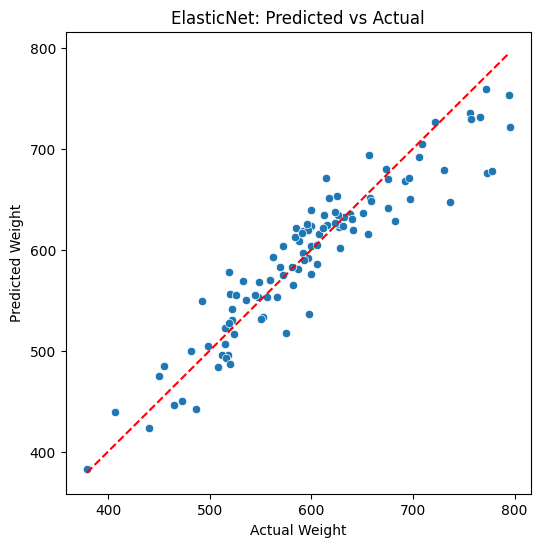

In [ ]:
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Weight")
plt.ylabel("Predicted Weight")
plt.title("ElasticNet: Predicted vs Actual")
plt.show()

Points are clustered close to the diagonal red line → the model predicts weights quite accurately. However , slightly less precision for heavier animals.

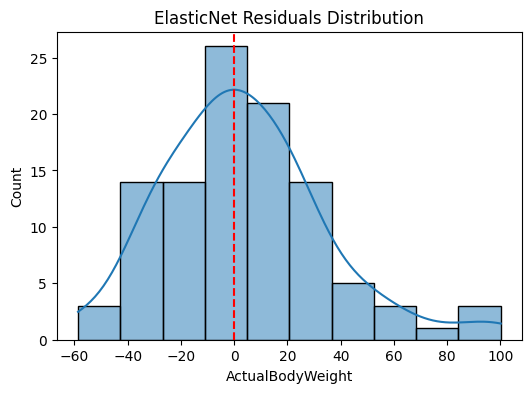

In [ ]:
residuals = y_test - y_pred
plt.figure(figsize=(6,4))
sns.histplot(residuals, kde=True)
plt.axvline(0, color='red', linestyle='--')
plt.title("ElasticNet Residuals Distribution")
plt.show()

Residuals are centered around zero, roughly symmetric → no major bias in predictions.

Slight positive tail (few underestimations for heavier cattle) — consistent with the scatterplot observation.

/tmp/ipython-input-693671875.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Coefficient", y="Feature", data=coef_df, palette="coolwarm")


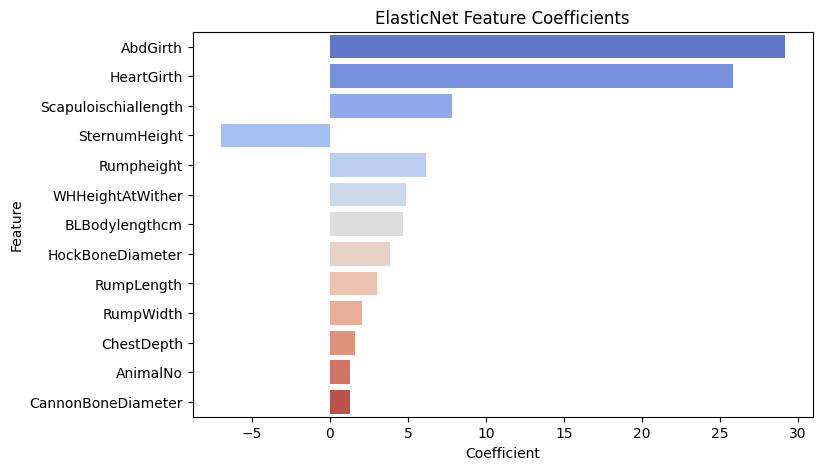

,Feature,Coefficient
10,AbdGirth,29.165967
9,HeartGirth,25.885720
4,Scapuloischiallength,7.858330
5,SternumHeight,-6.993225
2,Rumpheight,6.151760
1,WHHeightAtWither,4.901761
3,BLBodylengthcm,4.706452
12,HockBoneDiameter,3.844390
8,RumpLength,3.038497
7,RumpWidth,2.051945


In [ ]:
coef_df = pd.DataFrame({
    "Feature": X_train.columns,
    "Coefficient": best_elastic.named_steps["model"].coef_
}).sort_values(by="Coefficient", key=abs, ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x="Coefficient", y="Feature", data=coef_df, palette="coolwarm")
plt.title("ElasticNet Feature Coefficients")
plt.show()

coef_df

One negative predictor: SternumHeight (−6.99) → higher SternumHeight is associated with slightly lower weight, possibly due to body shape differences.

In [ ]:
feat_names = X_train.columns if hasattr(X_train, "columns") else [f"feat_{i}" for i in range(X_train.shape[1])]

In [ ]:
try:
    en_coef = best_elastic.named_steps["model"].coef_
except:
    best_elastic = Pipeline([
        ("scaler", StandardScaler()),
        ("model", ElasticNetCV(l1_ratio=[0.2, 0.5, 0.8], cv=5, random_state=42, max_iter=20000))
    ])
    best_elastic.fit(X_train, y_train)
    en_coef = best_elastic.named_steps["model"].coef_

In [ ]:
rf_importances = rf.feature_importances_
shap_importance = np.abs(shap_values).mean(axis=0)

In [ ]:
imp_df = pd.DataFrame({
    "feature": feat_names,
    "elastic_coef": en_coef,
    "elastic_importance": np.abs(en_coef),
    "rf_importance": rf_importances,
    "shap_importance": shap_importance
})

In [ ]:
for col in ["elastic_importance", "rf_importance", "shap_importance"]:
    imp_df[col.replace("importance", "rank")] = imp_df[col].rank(ascending=False, method="average")

In [ ]:
imp_df["consensus_rank"] = imp_df[["elastic_rank", "rf_rank", "shap_rank"]].mean(axis=1)
imp_df = imp_df.sort_values("consensus_rank").reset_index(drop=True)

In [ ]:
print(len(imp_df))
display(imp_df)

13


,feature,elastic_coef,elastic_importance,rf_importance,shap_importance,elastic_rank,rf_rank,shap_rank,consensus_rank
0,HeartGirth,25.885720,25.885720,0.609989,40.604506,2.0,1.0,1.0,1.333333
1,AbdGirth,29.165967,29.165967,0.223422,18.585834,1.0,2.0,2.0,1.666667
2,Scapuloischiallength,7.858330,7.858330,0.029719,4.501880,3.0,3.0,3.0,3.000000
3,BLBodylengthcm,4.706452,4.706452,0.023184,3.087306,7.0,4.0,4.0,5.000000
4,Rumpheight,6.151760,6.151760,0.014809,1.717801,5.0,7.0,6.0,6.000000
5,WHHeightAtWither,4.901761,4.901761,0.016438,1.438329,6.0,5.0,8.0,6.333333
6,SternumHeight,-6.993225,6.993225,0.011123,1.850913,4.0,12.0,5.0,7.000000
7,RumpLength,3.038497,3.038497,0.013932,1.689258,9.0,8.0,7.0,8.000000
8,HockBoneDiameter,3.844390,3.844390,0.012131,1.428454,8.0,9.0,9.0,8.666667
9,ChestDepth,1.627062,1.627062,0.015590,1.193845,11.0,6.0,10.0,9.000000


In [ ]:
print("Top features by consensus:")
display(imp_df[["feature","elastic_coef","elastic_importance","rf_importance","shap_importance","consensus_rank"]])

Top features by consensus:


,feature,elastic_coef,elastic_importance,rf_importance,shap_importance,consensus_rank
0,HeartGirth,25.885720,25.885720,0.609989,40.604506,1.333333
1,AbdGirth,29.165967,29.165967,0.223422,18.585834,1.666667
2,Scapuloischiallength,7.858330,7.858330,0.029719,4.501880,3.000000
3,BLBodylengthcm,4.706452,4.706452,0.023184,3.087306,5.000000
4,Rumpheight,6.151760,6.151760,0.014809,1.717801,6.000000
5,WHHeightAtWither,4.901761,4.901761,0.016438,1.438329,6.333333
6,SternumHeight,-6.993225,6.993225,0.011123,1.850913,7.000000
7,RumpLength,3.038497,3.038497,0.013932,1.689258,8.000000
8,HockBoneDiameter,3.844390,3.844390,0.012131,1.428454,8.666667
9,ChestDepth,1.627062,1.627062,0.015590,1.193845,9.000000


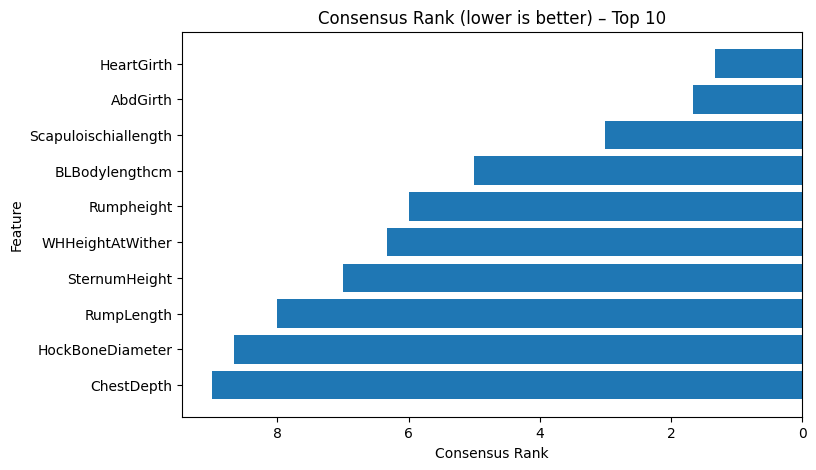

In [ ]:
top_show = 10
plot_df = imp_df.head(top_show).copy()
plt.figure(figsize=(8,5))
plt.barh(plot_df["feature"][::-1], plot_df["consensus_rank"][::-1])
plt.gca().invert_xaxis()
plt.title(f"Consensus Rank (lower is better) – Top {top_show}")
plt.xlabel("Consensus Rank")
plt.ylabel("Feature")
plt.show()

In [ ]:
cv = KFold(n_splits=5, shuffle=True, random_state=42)

In [ ]:
def eval_subset(k, estimator):
    feats = imp_df.head(k)["feature"].tolist()
    est = clone(estimator)
    cv_r2 = cross_val_score(est, X_train[feats], y_train, cv=cv, scoring="r2").mean()
    est.fit(X_train[feats], y_train)
    y_pred = est.predict(X_test[feats])
    test_r2 = r2_score(y_test, y_pred)
    test_rmse = mean_squared_error(y_test, y_pred)
    return {"Top Features": k, "Features": feats, "CV R²": cv_r2, "Test R²": test_r2, "Test RMSE": test_rmse}

In [ ]:
results = []
for k in [5, 6, 7, 8]:
    results.append(eval_subset(k, best_elastic))

In [ ]:
all_k = X_train.shape[1]
results.append(eval_subset(all_k, best_elastic))

In [ ]:
results_df_k = pd.DataFrame(results).sort_values("Top Features")
display(results_df_k[["Top Features","CV R²","Test R²","Test RMSE"]])
print("\nSelected features by k:")
for row in results_df_k.itertuples(index=False):
    print(f"k={row[0]} -> {row.Features}")

,Top Features,CV R²,Test R²,Test RMSE
0,5,0.838002,0.848263,1118.878555
1,6,0.837937,0.850229,1104.386585
2,7,0.842721,0.865833,989.325833
3,8,0.842292,0.869542,961.973066
4,13,0.838700,0.871981,943.992239



Selected features by k:
k=5 -> ['HeartGirth', 'AbdGirth', 'Scapuloischiallength', 'BLBodylengthcm', 'Rumpheight']
k=6 -> ['HeartGirth', 'AbdGirth', 'Scapuloischiallength', 'BLBodylengthcm', 'Rumpheight', 'WHHeightAtWither']
k=7 -> ['HeartGirth', 'AbdGirth', 'Scapuloischiallength', 'BLBodylengthcm', 'Rumpheight', 'WHHeightAtWither', 'SternumHeight']
k=8 -> ['HeartGirth', 'AbdGirth', 'Scapuloischiallength', 'BLBodylengthcm', 'Rumpheight', 'WHHeightAtWither', 'SternumHeight', 'RumpLength']
k=13 -> ['HeartGirth', 'AbdGirth', 'Scapuloischiallength', 'BLBodylengthcm', 'Rumpheight', 'WHHeightAtWither', 'SternumHeight', 'RumpLength', 'HockBoneDiameter', 'ChestDepth', 'RumpWidth', 'AnimalNo', 'CannonBoneDiameter']


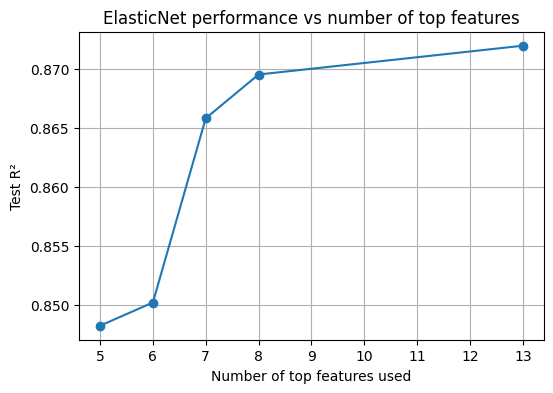

In [ ]:
plt.figure(figsize=(6,4))
plt.plot(results_df_k["Top Features"], results_df_k["Test R²"], marker="o")
plt.title("ElasticNet performance vs number of top features")
plt.xlabel("Number of top features used")
plt.ylabel("Test R²")
plt.grid(True)
plt.show()

In [ ]:
top8 = ['HeartGirth','AbdGirth','Scapuloischiallength','BLBodylengthcm',
        'Rumpheight','WHHeightAtWither','SternumHeight','RumpLength']

X8_train = X_train[top8].copy()
X8_test  = X_test[top8].copy()

In [ ]:
cv = KFold(n_splits=5, shuffle=True, random_state=42)

In [ ]:
results_8 = []
best_models_8 = {}

In [ ]:
for name, (estimator, param_grid) in pipelines.items():
    gs = GridSearchCV(
        estimator=estimator,
        param_grid=param_grid,
        scoring={"r2": "r2", "rmse": "neg_root_mean_squared_error"},
        refit="r2",
        cv=cv,
        n_jobs=-1
    )
    gs.fit(X8_train, y_train)
    best_models_8[name] = gs.best_estimator_

    cv_r2 = gs.best_score_
    cv_rmse = -gs.cv_results_["mean_test_rmse"][gs.best_index_]

    y_pred = gs.best_estimator_.predict(X8_test)
    test_r2 = r2_score(y_test, y_pred)
    test_rmse = mean_squared_error(y_test, y_pred)

    results_8.append({
        "Model": name,
        "CV R2": cv_r2,
        "CV RMSE": cv_rmse,
        "Test R2": test_r2,
        "Test RMSE": test_rmse,
        "Best Params": gs.best_params_
    })

/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000073 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 286
[LightGBM] [Info] Number of data points in the train set: 413, number of used features: 8
[LightGBM] [Info] Start training from score 603.607748
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

In [ ]:
results_df_8 = pd.DataFrame(results_8).sort_values(by="CV R2", ascending=False)
results_df_8

,Model,CV R2,CV RMSE,Test R2,Test RMSE,Best Params
3,ElasticNet,0.842292,29.577814,0.869542,961.973066,"{'model__alpha': 0.1, 'model__l1_ratio': 0.5}"
1,Ridge,0.842253,29.588791,0.870838,952.418497,{'model__alpha': 10}
0,Linear Regression,0.841726,29.650351,0.871690,946.137923,{'model__fit_intercept': True}
2,Lasso,0.841726,29.650357,0.871687,946.152963,{'model__alpha': 0.0005}
4,SVR (RBF),0.837523,30.094938,0.870770,952.918587,"{'model__C': 100, 'model__epsilon': 0.1, 'mode..."
7,XGBoost,0.822768,31.427430,0.853741,1078.485840,"{'colsample_bytree': 0.8, 'learning_rate': 0.0..."
6,Random Forest,0.813018,32.195466,0.846462,1132.164267,"{'max_depth': 8, 'min_samples_leaf': 2, 'min_s..."
8,LightGBM,0.794166,33.809694,0.858643,1042.338215,"{'colsample_bytree': 0.8, 'learning_rate': 0.0..."
5,KNN,0.766404,36.181131,0.782244,1605.691878,"{'model__n_neighbors': 9, 'model__weights': 'd..."


In [ ]:
pca_pipelines = {
    "ElasticNet + PCA": (
        Pipeline([("scaler", StandardScaler()),
                  ("pca", PCA()),
                  ("model", ElasticNet(random_state=42, max_iter=20000))]),
        {
            "pca__n_components": [2, 3, 4, 5, 6, 7, 8],
            "model__alpha": [0.0005, 0.001, 0.01, 0.1, 1],
            "model__l1_ratio": [0.2, 0.5, 0.8]
        }
    ),
    "Ridge + PCA": (
        Pipeline([("scaler", StandardScaler()),
                  ("pca", PCA()),
                  ("model", Ridge(random_state=42))]),
        {
            "pca__n_components": [2, 3, 4, 5, 6, 7, 8],
            "model__alpha": [0.1, 1, 10, 100]
        }
    ),
    "Lasso + PCA": (
        Pipeline([("scaler", StandardScaler()),
                  ("pca", PCA()),
                  ("model", Lasso(random_state=42, max_iter=20000))]),
        {
            "pca__n_components": [2, 3, 4, 5, 6, 7, 8],
            "model__alpha": [0.0005, 0.001, 0.01, 0.1, 1]
        }
    ),
    "SVR (RBF) + PCA": (
        Pipeline([("scaler", StandardScaler()),
                  ("pca", PCA()),
                  ("model", SVR())]),
        {
            "pca__n_components": [2, 3, 4, 5, 6, 7, 8],
            "model__C": [1, 10, 50, 100],
            "model__gamma": ["scale", 0.1, 0.01],
            "model__epsilon": [0.1, 0.2]
        }
    ),
    "KNN + PCA": (
        Pipeline([("scaler", StandardScaler()),
                  ("pca", PCA()),
                  ("model", KNeighborsRegressor())]),
        {
            "pca__n_components": [2, 3, 4, 5, 6, 7, 8],
            "model__n_neighbors": [3,5,7,9],
            "model__weights": ["uniform", "distance"]
        }
    ),
        "Random Forest": (
        RandomForestRegressor(random_state=42, n_jobs=-1),
        {
            "n_estimators": [300, 600],
            "max_depth": [None, 8, 12],
            "min_samples_split": [2, 5],
            "min_samples_leaf": [1, 2]
        }
    ),
    "XGBoost": (
        XGBRegressor(random_state=42, n_jobs=-1, tree_method="hist"),
        {
            "n_estimators": [400, 700],
            "max_depth": [3, 5, 7],
            "learning_rate": [0.03, 0.1],
            "subsample": [0.8, 1.0],
            "colsample_bytree": [0.8, 1.0]
        }
    ),
    "LightGBM": (
        LGBMRegressor(random_state=42, n_jobs=-1),
        {
            "n_estimators": [400, 700],
            "max_depth": [-1, 8, 12],
            "num_leaves": [31, 63],
            "learning_rate": [0.03, 0.1],
            "subsample": [0.8, 1.0],
            "colsample_bytree": [0.8, 1.0]
        }
    )
}

In [ ]:
pca_results = []
best_pca_models = {}

In [ ]:
for name, (pipe, grid) in pca_pipelines.items():
    gs = GridSearchCV(
        estimator=pipe,
        param_grid=grid,
        scoring={"r2": "r2", "rmse": "neg_root_mean_squared_error"},
        refit="r2",
        cv=cv,
        n_jobs=-1
    )
    gs.fit(X8_train, y_train)
    best_pca_models[name] = gs.best_estimator_

    cv_r2 = gs.best_score_
    cv_rmse = -gs.cv_results_["mean_test_rmse"][gs.best_index_]

    y_pred = gs.best_estimator_.predict(X8_test)
    test_r2 = r2_score(y_test, y_pred)
    test_rmse = mean_squared_error(y_test, y_pred)

    pca_results.append({
        "Model": name,
        "CV R2": cv_r2,
        "CV RMSE": cv_rmse,
        "Test R2": test_r2,
        "Test RMSE": test_rmse,
        "Best Params": gs.best_params_
    })

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000064 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 286
[LightGBM] [Info] Number of data points in the train set: 413, number of used features: 8
[LightGBM] [Info] Start training from score 603.607748
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

In [ ]:
pca_results_df = pd.DataFrame(pca_results).sort_values(by="CV R2", ascending=False)
pca_results_df

,Model,CV R2,CV RMSE,Test R2,Test RMSE,Best Params
2,Lasso + PCA,0.844936,29.309948,0.869429,962.808882,"{'model__alpha': 1, 'pca__n_components': 6}"
0,ElasticNet + PCA,0.844844,29.323954,0.871957,944.162376,"{'model__alpha': 0.1, 'model__l1_ratio': 0.8, ..."
1,Ridge + PCA,0.844672,29.347293,0.872915,937.101041,"{'model__alpha': 1, 'pca__n_components': 6}"
3,SVR (RBF) + PCA,0.842012,29.649650,0.872904,937.181424,"{'model__C': 100, 'model__epsilon': 0.1, 'mode..."
6,XGBoost,0.819241,31.762223,0.851245,1096.889160,"{'colsample_bytree': 0.8, 'learning_rate': 0.0..."
5,Random Forest,0.813168,32.189400,0.845363,1140.268329,"{'max_depth': 8, 'min_samples_leaf': 2, 'min_s..."
4,KNN + PCA,0.804008,33.025200,0.828977,1261.093603,"{'model__n_neighbors': 7, 'model__weights': 'u..."
7,LightGBM,0.789404,34.237613,0.856606,1057.358562,"{'colsample_bytree': 0.8, 'learning_rate': 0.0..."


In [ ]:
rkf = RepeatedKFold(n_splits=5, n_repeats=5, random_state=42)

In [ ]:
tables = []
for name in ["results_df", "results_df_8", "pca_results_df"]:
    if name in globals():
        df = globals()[name]
        if {"Model","CV R2"}.issubset(df.columns):
            tables.append(df[["Model","CV R2","Best Params"]].copy())

In [ ]:
print(tables)

[               Model     CV R2
3         ElasticNet  0.838700
1              Ridge  0.838600
2              Lasso  0.838060
0  Linear Regression  0.837878
4          SVR (RBF)  0.827377
7            XGBoost  0.822211
6      Random Forest  0.811811
8           LightGBM  0.800524
5                KNN  0.744912,                Model     CV R2
3         ElasticNet  0.842292
1              Ridge  0.842253
0  Linear Regression  0.841726
2              Lasso  0.841726
4          SVR (RBF)  0.837523
7            XGBoost  0.822768
6      Random Forest  0.813018
8           LightGBM  0.794166
5                KNN  0.766404,               Model     CV R2
2       Lasso + PCA  0.844936
0  ElasticNet + PCA  0.844844
1       Ridge + PCA  0.844672
3   SVR (RBF) + PCA  0.842012
6           XGBoost  0.819241
5     Random Forest  0.813168
4         KNN + PCA  0.804008
7          LightGBM  0.789404]


In [ ]:
all_best = {}
if "best_models_top8_all" in globals(): all_best.update(best_models_top8_all)
extra_rows = []
for name, est in all_best.items():
    if any((name in t["Model"].values) for t in tables):
        continue
    X_cv = X8_train if "X8_train" in globals() else X_train
    scores = cross_val_score(clone(est), X_cv, y_train, cv=rkf, scoring="r2", n_jobs=-1)
    extra_rows.append({"Model": name, "CV R2": scores.mean()})
if extra_rows:
    tables.append(pd.DataFrame(extra_rows))

In [ ]:
combined_rank = (pd.concat(tables, ignore_index=True)
                 .groupby("Model", as_index=False)["CV R2"].mean()
                 .sort_values("CV R2", ascending=False))
display(combined_rank.head(10))

,Model,CV R2
5,Lasso + PCA,0.844936
1,ElasticNet + PCA,0.844844
10,Ridge + PCA,0.844672
12,SVR (RBF) + PCA,0.842012
0,ElasticNet,0.840496
9,Ridge,0.840426
4,Lasso,0.839893
7,Linear Regression,0.839802
11,SVR (RBF),0.832450
13,XGBoost,0.821407


In [ ]:
top_names = combined_rank["Model"].head(5).tolist()
print(top_names)

['Lasso + PCA', 'ElasticNet + PCA', 'Ridge + PCA', 'SVR (RBF) + PCA', 'ElasticNet']


* Significance testing
* Back‑project coefficients for PCA pipelines (to original 8 features)
* Save Model
* Documentation of findings

